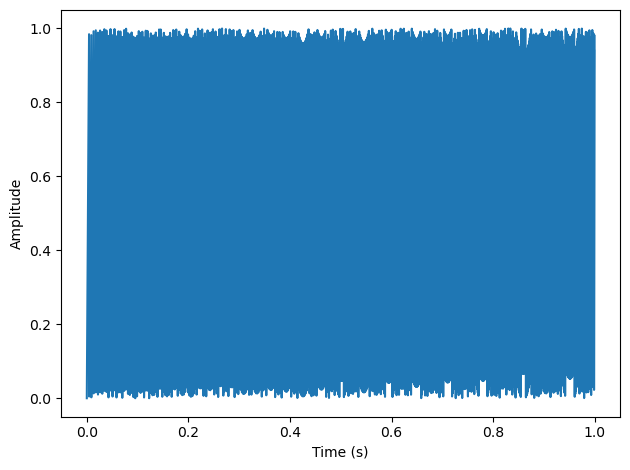

In [1]:
from thinkdsp import Chirp, decorate
import numpy as np

class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        """
        Evaluate the SawtoothChirp waveform at the given times.

        Parameters:
        - ts: array of time values at which to evaluate the waveform.

        Returns:
        - array of amplitude values at the given times.
        """
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        phases = 2 * np.pi * np.cumsum(freqs * dts)
        cycles = phases / (2 * np.pi)
        frac, _ = np.modf(cycles)
        ys = self.amp * frac
        return ys

# Create a SawtoothChirp signal with varying frequency from 220 Hz to 880 Hz over 1 second
signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=1, framerate=11025)  # Use a lower framerate to make aliasing apparent

# Plot the waveform
wave.make_audio()
wave.plot()
decorate(xlabel='Time (s)', ylabel='Amplitude')


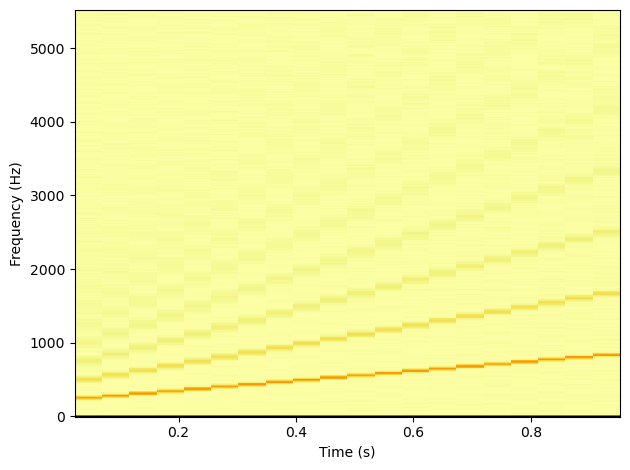

In [2]:
# Create and plot the spectrogram
spectrogram = wave.make_spectrogram(seg_length=1024)
spectrogram.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')


In [3]:
# Here's what it sounds like.
signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=1, framerate=11025)
wave.apodize()
wave.make_audio()